In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data_path = './data'
out_path = './output'

In [3]:
mpg = pd.read_csv(data_path+'/mpg.csv')
economics = pd.read_csv(data_path+'/economics.csv')
midwest = pd.read_csv(data_path+'/midwest.csv')

# 그래프 만들기

## 1 산점도 - 변수 간 관계 표현하기

<Axes: xlabel='displ', ylabel='hwy'>

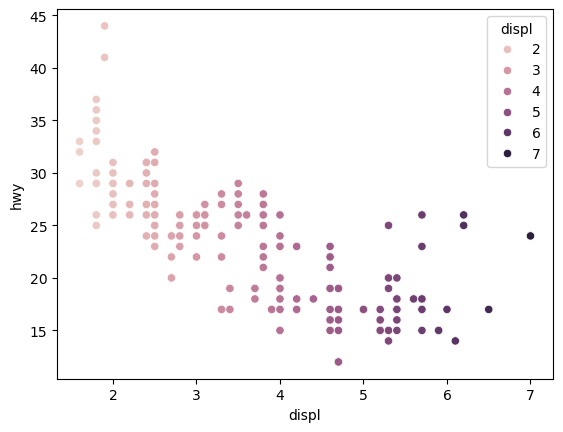

In [4]:
# x축 displ(배기량), y축 hwy(고속도로 연비)를 나타낸 산점도 만들기
sns.scatterplot(data = mpg , x =mpg['displ'], y = mpg['hwy'], hue = 'displ')

### 축 범위 설정

[(3.0, 6.0)]

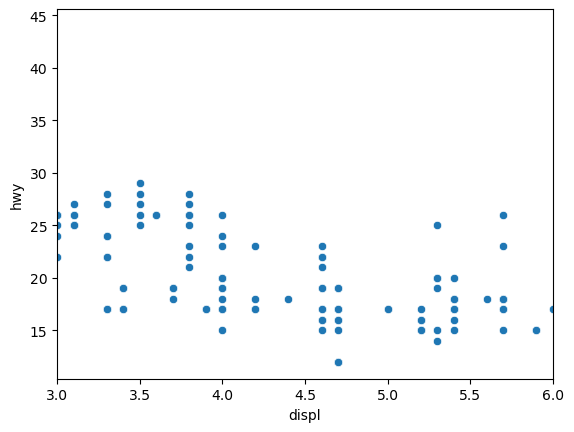

In [5]:
# x축 범위 3~6으로 제한
sns.scatterplot(data=mpg,x='displ',y='hwy')\
                .set(xlim=(3,6))

[(3.0, 6.0), (10.0, 30.0)]

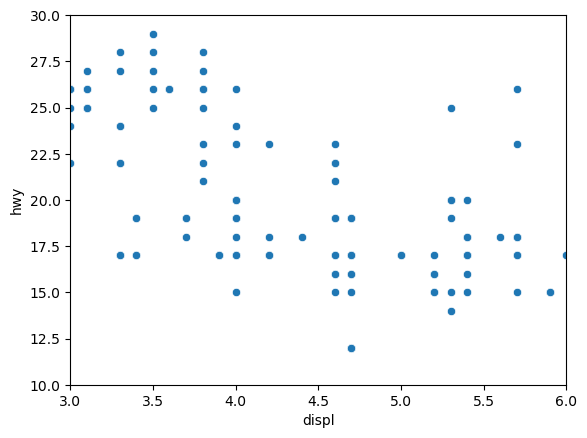

In [6]:
# x축 범위 3~6으로 제한, y축 10~30으로 제한
sns.scatterplot(data=mpg,x='displ',y='hwy')\
                .set(xlim=(3,6),ylim=(10,30))

### 종류별로 표식 색깔 바꾸기

<Axes: xlabel='displ', ylabel='hwy'>

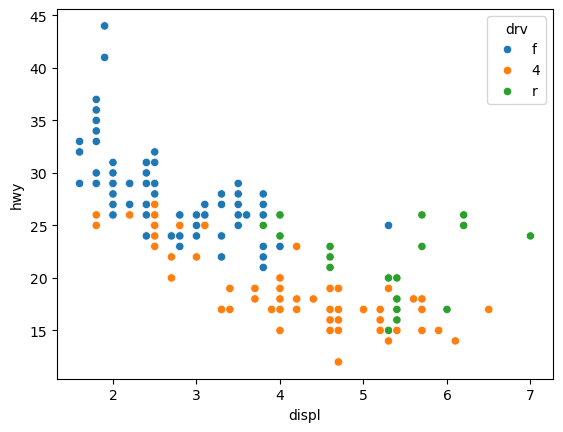

In [7]:
# drv(구동방식)별로 표식 색깔 다르게 표현
sns.scatterplot(data=mpg,x='displ',y='hwy',hue='drv')

## 2 막대 그래프 - 집단 간의 차이 표현하기

### 평균 막대 그래프 만들기 - drv(구동방식)별 hwy(고속도로 연비)의 평균

In [8]:
# 1. 집단별 평균표 만들기
# drv별 분리 -> hwy 평균 구하기
df_mpg = mpg.groupby('drv').agg(hwy_mean=('hwy','mean'))
df_mpg

,hwy_mean
drv,
4,19.174757
f,28.160377
r,21.000000


In [9]:
df_mpg = mpg.groupby('drv', as_index = False).agg(hwy_mean=('hwy','mean'))
df_mpg

,drv,hwy_mean
0,4,19.174757
1,f,28.160377
2,r,21.000000


<Axes: xlabel='drv', ylabel='hwy_mean'>

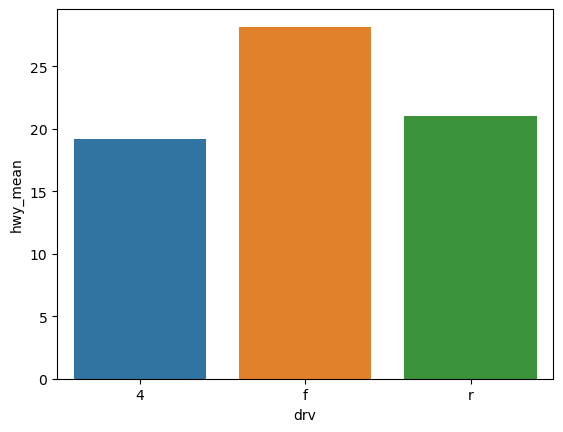

In [10]:
# 2. 그래프 만들기
sns.barplot(data = df_mpg, x='drv',y='hwy_mean',hue='drv')

In [11]:
# 3. 크기순으로 정렬하기
# 데이터 프레임 정렬하기
df_mpg = df_mpg.sort_values('hwy_mean',ascending=False)

<Axes: xlabel='drv', ylabel='hwy_mean'>

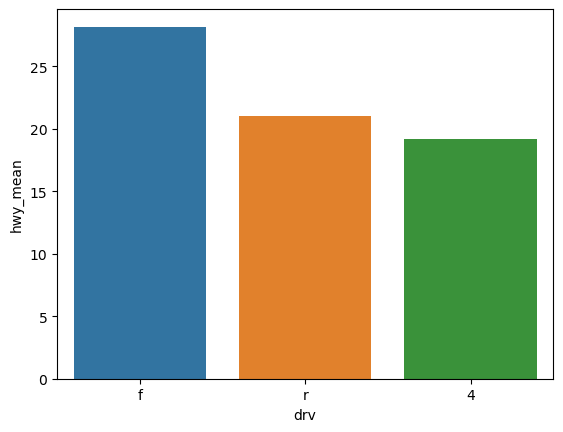

In [12]:
# 막대 그래프 만들기
sns.barplot(data=df_mpg,x='drv',y='hwy_mean',hue='drv')

### 빈도 막대 그래프 만들기 - drv별 빈도

In [13]:
# 1. 집단별 빈도표 만들기
# 구동 방식별 빈도
mpg_drv = mpg.groupby('drv',as_index=False).agg(drv_n = ('drv','count'))
mpg_drv

,drv,drv_n
0,4,103
1,f,106
2,r,25


<Axes: xlabel='drv', ylabel='drv_n'>

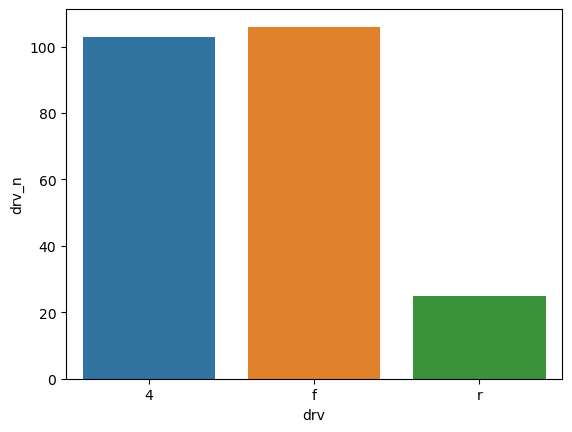

In [14]:
# 2. 그래프 만들기
sns.barplot(data=mpg_drv,x='drv',y='drv_n',hue='drv')

<Axes: xlabel='drv', ylabel='count'>

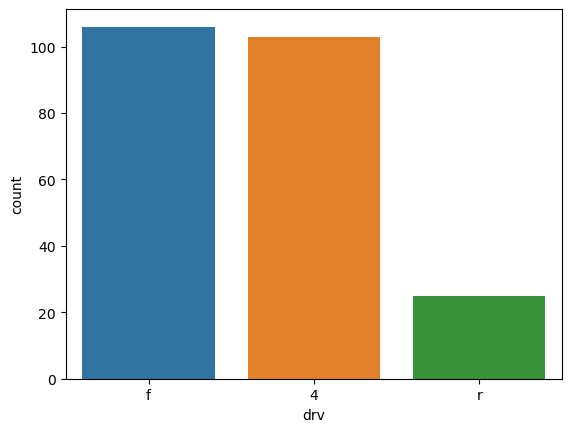

In [15]:
# 빈도 막대 그래프 만들기
sns.countplot(data=mpg,x='drv',hue='drv')

In [16]:
mpg['drv'].unique()

array(['f', '4', 'r'], dtype=object)

In [17]:
df_mpg['drv'].unique()

array(['f', 'r', '4'], dtype=object)

<Axes: xlabel='drv', ylabel='count'>

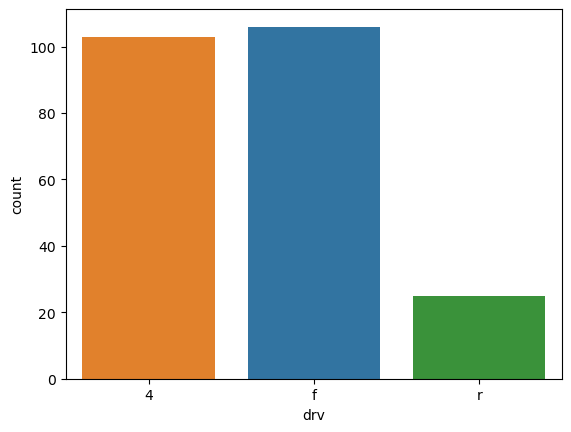

In [18]:
# 4,f,r 순으로 막대 정렬
# 빈도 막대 그래프 만들기
sns.countplot(data=mpg,x='drv',hue='drv',order=['4','f','r'])

## 3 선 그래프 - 시간에 따라 달라지는 데이터 표현하기

### 시계열 그래프 만들기

In [19]:
economics.head()

,date,pce,pop,psavert,uempmed,unemploy
0,1967-07-01,506.7,198712.0,12.6,4.5,2944
1,1967-08-01,509.8,198911.0,12.6,4.7,2945
2,1967-09-01,515.6,199113.0,11.9,4.6,2958
3,1967-10-01,512.2,199311.0,12.9,4.9,3143
4,1967-11-01,517.4,199498.0,12.8,4.7,3066


<Axes: xlabel='date', ylabel='unemploy'>

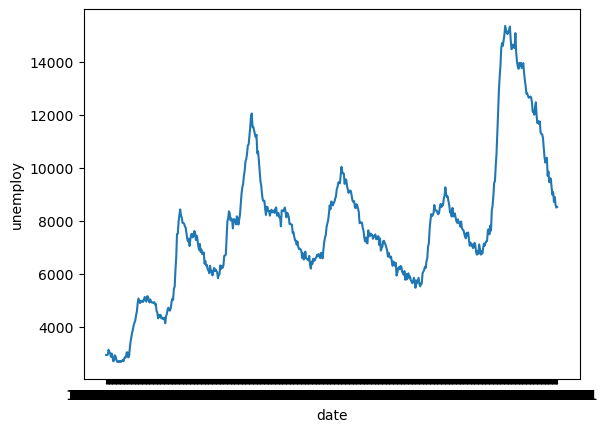

In [20]:
# 선 그래프 만들기 - x축 시간(date), y축 실업자 수(unemploy)
sns.lineplot(data = economics, x = 'date', y = 'unemploy')

In [21]:
# 1. 날짜 시간 타입 변수 만들기
economics['date2'] = pd.to_datetime(economics['date'])
# 변수 타입 확인
print(economics.info())
economics[['date','date2']].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      574 non-null    object        
 1   pce       574 non-null    float64       
 2   pop       574 non-null    float64       
 3   psavert   574 non-null    float64       
 4   uempmed   574 non-null    float64       
 5   unemploy  574 non-null    int64         
 6   date2     574 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 31.5+ KB
None


,date,date2
0,1967-07-01,1967-07-01
1,1967-08-01,1967-08-01
2,1967-09-01,1967-09-01
3,1967-10-01,1967-10-01
4,1967-11-01,1967-11-01


In [22]:
# 연도 추출
economics['date2'].dt.year.head()

0    1967
1    1967
2    1967
3    1967
4    1967
Name: date2, dtype: int32

In [23]:
# 월 추출
economics['date2'].dt.month.head()

0     7
1     8
2     9
3    10
4    11
Name: date2, dtype: int32

In [24]:
# 일 추출
economics['date2'].dt.day.head()

0    1
1    1
2    1
3    1
4    1
Name: date2, dtype: int32

In [25]:
# 연도 변수 말들기
economics['year'] = economics['date2'].dt.year
economics[['year']].head()

,year
0,1967
1,1967
2,1967
3,1967
4,1967


<Axes: xlabel='year', ylabel='unemploy'>

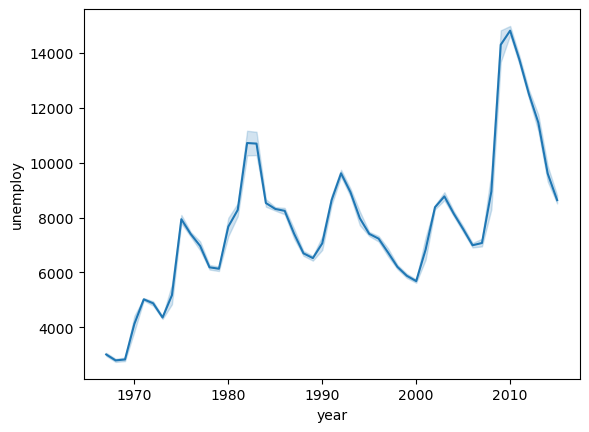

In [26]:
# 선 그래프 만들기 - x축 시간(연도), y축 실업자 수(unemploy)
sns.lineplot(data = economics, x = 'year', y = 'unemploy')

C:\Users\hyunk\AppData\Local\Temp\ipykernel_6568\462717456.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=economics,x='year',y='unemploy',ci=None)


<Axes: xlabel='year', ylabel='unemploy'>

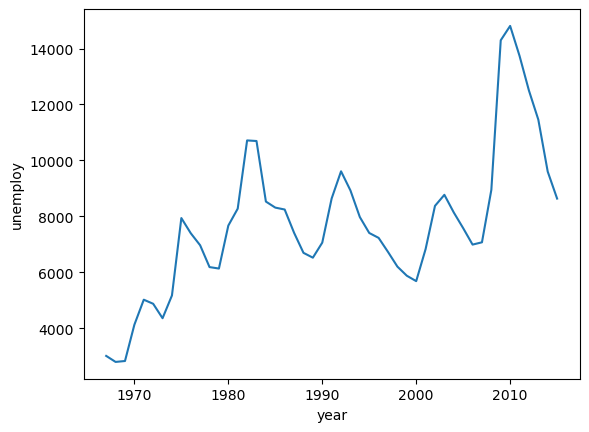

In [27]:
# 신뢰구간 제거
sns.lineplot(data=economics,x='year',y='unemploy',ci=None)

## 4 상자 그림 - 집단 간 분포 차이 표현하기

<Axes: xlabel='drv', ylabel='hwy'>

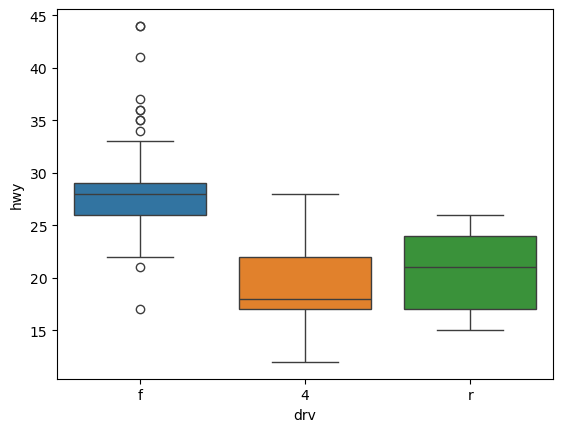

In [28]:
# 구동 방식(drv)별 고속도로 연비(hwy)
sns.boxplot(data = mpg, x = 'drv', y = 'hwy', hue = 'drv')

## 문제(14p)

<Axes: xlabel='cty', ylabel='hwy'>

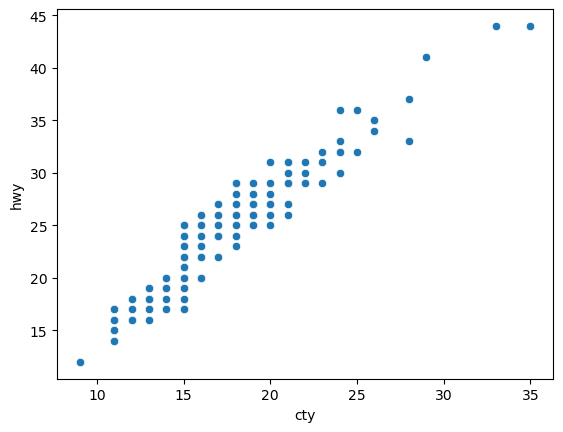

In [29]:
sns.scatterplot(data=mpg,x='cty',y='hwy')

In [30]:
midwest.head()
midwest.sort_values('poptotal',ascending=False).head()

,PID,county,state,area,poptotal,popdensity,popwhite,popblack,popamerindian,popasian,...,percollege,percprof,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category
15,576,COOK,IL,0.058,5105067,88018.3966,3204947,1317147,10289,188565,...,28.018117,8.329964,5023523,98.402685,14.198303,22.293497,11.665542,10.825269,1,AAU
275,1278,WAYNE,MI,0.035,2111687,60333.9143,1212007,849109,8048,21704,...,19.410404,4.985751,2084529,98.713919,20.065300,30.564270,17.066226,13.247350,1,AHU
294,2026,CUYAHOGA,OH,0.026,1412140,54313.0769,1025756,350185,2533,18085,...,25.085388,7.356736,1388547,98.329273,13.766117,21.580976,11.675506,10.213391,1,AAU
256,1259,OAKLAND,MI,0.055,1083592,19701.6727,970674,77488,3948,25103,...,36.963511,11.220563,1070844,98.823542,6.043644,8.452007,4.949889,6.477303,1,HLU
301,2033,FRANKLIN,OH,0.034,961437,28277.5588,783714,152840,2056,19437,...,32.204593,9.140922,935142,97.265031,12.990006,17.637868,11.818383,9.749349,1,HAU


In [31]:
midwest.sort_values('poptotal',ascending=False)[['poptotal']].head()

,poptotal
15,5105067
275,2111687
294,1412140
256,1083592
301,961437


<Axes: xlabel='poptotal', ylabel='popasian'>

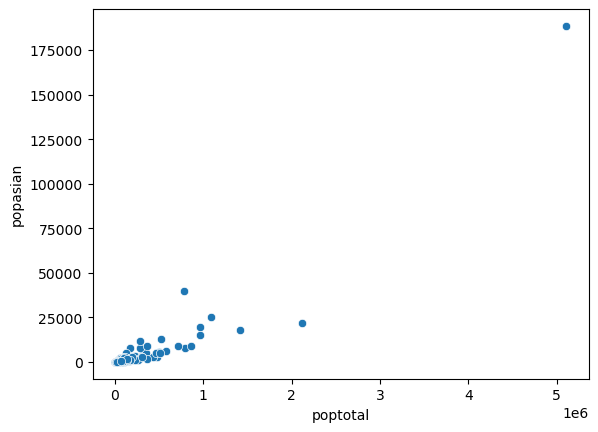

In [32]:
sns.scatterplot(data=midwest,x='poptotal',y='popasian')

[(0.0, 500000.0), (0.0, 10000.0)]

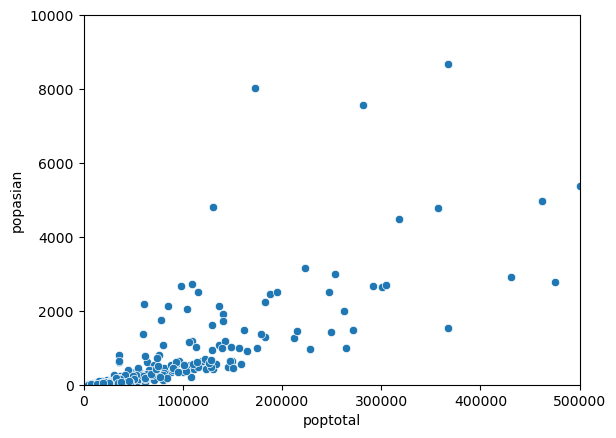

In [33]:
sns.scatterplot(data=midwest,x='poptotal',y='popasian')\
    .set(xlim = (0,500000),ylim = (0,10000))

In [34]:
mpg_suv = mpg.loc[mpg['category']=='suv'].groupby('manufacturer',as_index=False)\
.agg(cty_mean = ('cty','mean'))\
    .sort_values('cty_mean',ascending=False)\
    .head()

In [35]:
mpg_suv

,manufacturer,cty_mean
8,subaru,18.833333
9,toyota,14.375000
7,nissan,13.750000
3,jeep,13.500000
6,mercury,13.250000


<Axes: xlabel='manufacturer', ylabel='cty_mean'>

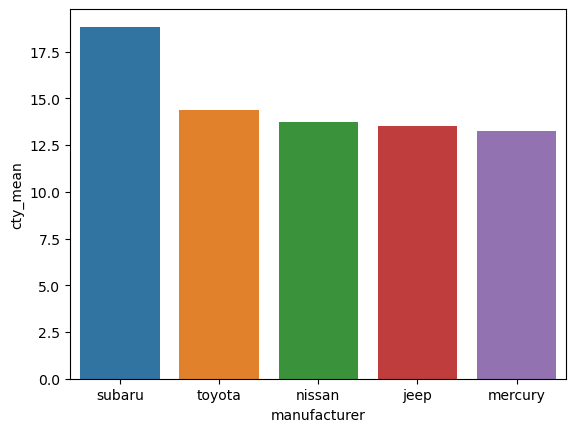

In [36]:
sns.barplot(data=mpg_suv,x='manufacturer',y='cty_mean',hue='manufacturer')

In [37]:
category_n = mpg.groupby('category',as_index=False)\
.agg(category_n = ('category','count'))\
.sort_values('category_n',ascending=False)

<Axes: xlabel='category', ylabel='category_n'>

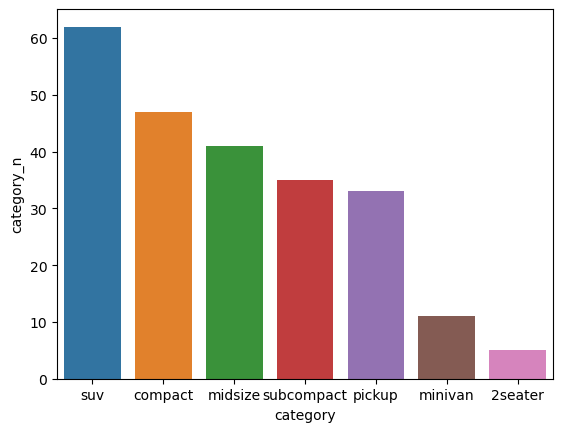

In [38]:
sns.barplot(data=category_n, x = 'category', y = 'category_n', hue = 'category')

<Axes: xlabel='category', ylabel='count'>

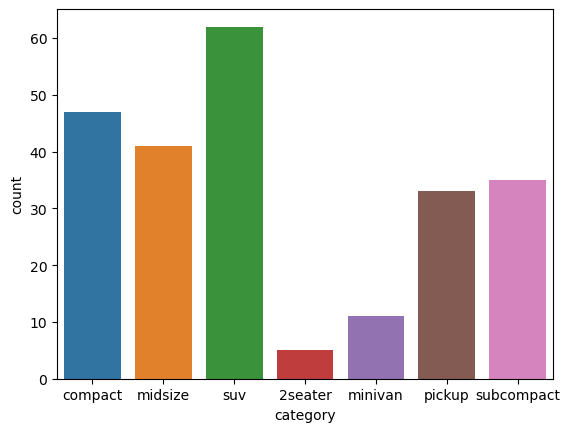

In [39]:
sns.countplot(data = mpg, x = 'category',hue = 'category')

In [40]:
economics.head()

,date,pce,pop,psavert,uempmed,unemploy,date2,year
0,1967-07-01,506.7,198712.0,12.6,4.5,2944,1967-07-01,1967
1,1967-08-01,509.8,198911.0,12.6,4.7,2945,1967-08-01,1967
2,1967-09-01,515.6,199113.0,11.9,4.6,2958,1967-09-01,1967
3,1967-10-01,512.2,199311.0,12.9,4.9,3143,1967-10-01,1967
4,1967-11-01,517.4,199498.0,12.8,4.7,3066,1967-11-01,1967


In [41]:
economics['date2'] = pd.to_datetime(economics['date'])
economics['year'] = economics['date2'].dt.year
economics[['year']].head(10)

,year
0,1967
1,1967
2,1967
3,1967
4,1967
5,1967
6,1968
7,1968
8,1968
9,1968


C:\Users\hyunk\AppData\Local\Temp\ipykernel_6568\3815823900.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data = economics, x = 'year', y = 'psavert',ci=None)


<Axes: xlabel='year', ylabel='psavert'>

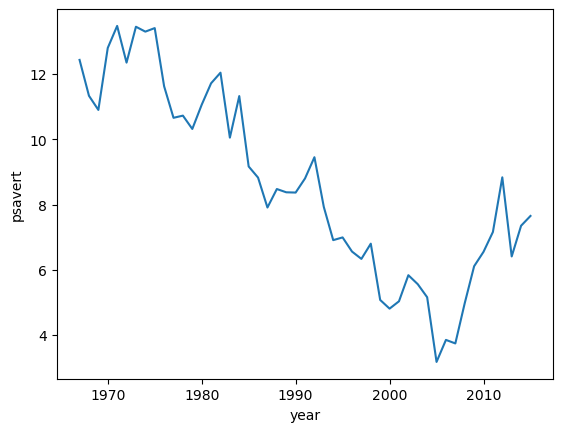

In [42]:
sns.lineplot(data = economics, x = 'year', y = 'psavert',ci=None)

In [43]:
economics_2014 = economics.loc[economics['year']==2014][['date2','psavert']]
economics_2014.head()

,date2,psavert
558,2014-01-01,7.1
559,2014-02-01,7.3
560,2014-03-01,7.4
561,2014-04-01,7.4
562,2014-05-01,7.4


In [44]:
economics_2014['month'] = economics_2014['date2'].dt.month
economics_2014[['month']]

,month
558,1
559,2
560,3
561,4
562,5
563,6
564,7
565,8
566,9
567,10


C:\Users\hyunk\AppData\Local\Temp\ipykernel_6568\2071796777.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data = economics_2014, x = 'month' , y = 'psavert', ci = None)


<Axes: xlabel='month', ylabel='psavert'>

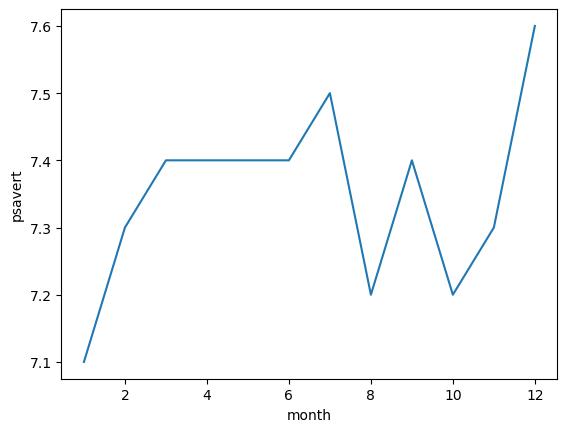

In [45]:
sns.lineplot(data = economics_2014, x = 'month' , y = 'psavert', ci = None)

In [46]:
mpg_compact_sub_suv = mpg.query('category in ["compact","subcompact","suv"]')[['category','cty']]
mpg_compact_sub_suv.head()

,category,cty
0,compact,18
1,compact,21
2,compact,20
3,compact,21
4,compact,16


<Axes: xlabel='category', ylabel='cty'>

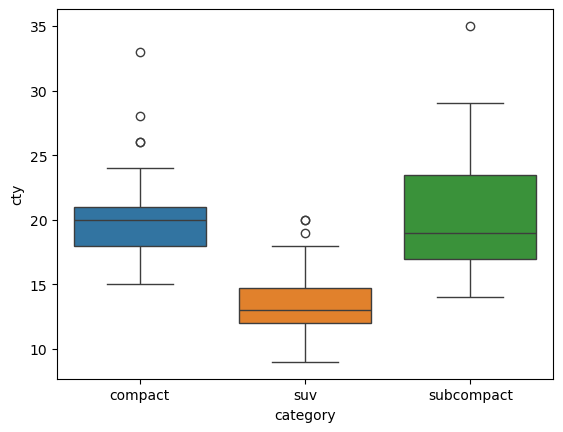

In [47]:
sns.boxplot(data=mpg_compact_sub_suv,x='category',y='cty',hue = 'category')